In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
#major commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for NLP
import nltk         #natural language toolkit
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

#for sentimaental analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#si-kit-learn to train the machine
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [ ]:
df = pd.read_excel("/content/Fsd.xlsx")
print(df)

     Sr #              Name  \
0       1   Queens’ Palace    
1       2         Victoria    
2       3         Victorian   
3       4       Baba Tikkah   
4       5     Marhaba Mahal   
..    ...               ...   
105   106         GODFATHER   
106   107        Latte e tè   
107   108  Bombay Chowpatty   
108   109  The Ritz Marquee   
109   110    KFC - D Ground   

                                               Address Online_Order/Booking  \
0    F56Q+PRR, East Canal Road, Gatwala Main Rd, op...                  Yes   
1               16 West Canal Road near Kashmir Bridge                   No   
2    Main Canal Expy, near Beaconhouse School, Fais...                   No   
3    West Canal Rd, near 204 Chak Road, Jahan E And...                  Yes   
4    204 RB East W Canal Rd, next to Babu Petroleum...                  Yes   
..                                                 ...                  ...   
105  4-B Unique ZBuilding, opp. NADRA Executive Off...                  Ye

In [ ]:
#what type of restaurants do majority of customers order from ?

def handleRating(value) :
  value = str(value).split('/')
  value = value[0];
  return float(value)

df['Rating'] = df['Rating'].apply(handleRating)
print(df.head())

   Sr #             Name                                            Address  \
0     1  Queens’ Palace   F56Q+PRR, East Canal Road, Gatwala Main Rd, op...   
1     2        Victoria              16 West Canal Road near Kashmir Bridge   
2     3        Victorian  Main Canal Expy, near Beaconhouse School, Fais...   
3     4      Baba Tikkah  West Canal Rd, near 204 Chak Road, Jahan E And...   
4     5    Marhaba Mahal  204 RB East W Canal Rd, next to Babu Petroleum...   

  Online_Order/Booking  Rating  Vote          Phone Listed_in(type)  \
0                  Yes     3.1     8   0321 9666921         Marquee   
1                   No     4.3    57   0331 8800000         Marquee   
2                   No     4.3    57   0301 6026000         Marquee   
3                  Yes     4.0  1490   0304 1111616          Dining   
4                  Yes     4.3   680  (041) 8523102          Dining   

                Location                                            Reviews  \
0  Canal Road Faisa

In [ ]:
#check if any null value in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sr #                  110 non-null    int64  
 1   Name                  110 non-null    object 
 2   Address               110 non-null    object 
 3   Online_Order/Booking  110 non-null    object 
 4   Rating                110 non-null    float64
 5   Vote                  110 non-null    int64  
 6   Phone                 110 non-null    object 
 7   Listed_in(type)       110 non-null    object 
 8   Location              110 non-null    object 
 9   Reviews               110 non-null    object 
 10  Label                 110 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 9.6+ KB


In [ ]:
df.head()

,Sr #,Name,Address,Online_Order/Booking,Rating,Vote,Phone,Listed_in(type),Location,Reviews,Label
0,1,Queens’ Palace,"F56Q+PRR, East Canal Road, Gatwala Main Rd, op...",Yes,3.1,8,0321 9666921,Marquee,Canal Road Faisalabad,Location is good no doubt. But staff is not go...,Positive
1,2,Victoria,16 West Canal Road near Kashmir Bridge,No,4.3,57,0331 8800000,Marquee,Canal Road Faisalabad,Good food and excellent quality.,Very Positive
2,3,Victorian,"Main Canal Expy, near Beaconhouse School, Fais...",No,4.3,57,0301 6026000,Marquee,Canal Road Faisalabad,Ambience and food was good but food serving se...,Negative
3,4,Baba Tikkah,"West Canal Rd, near 204 Chak Road, Jahan E And...",Yes,4.0,1490,0304 1111616,Dining,Canal Road Faisalabad,Nice and tasty place especially rooftop. Servi...,Very Positive
4,5,Marhaba Mahal,"204 RB East W Canal Rd, next to Babu Petroleum...",Yes,4.3,680,(041) 8523102,Dining,Canal Road Faisalabad,Highly recommended place if you are with famil...,Very Positive


Text(0, 0.5, 'Count')

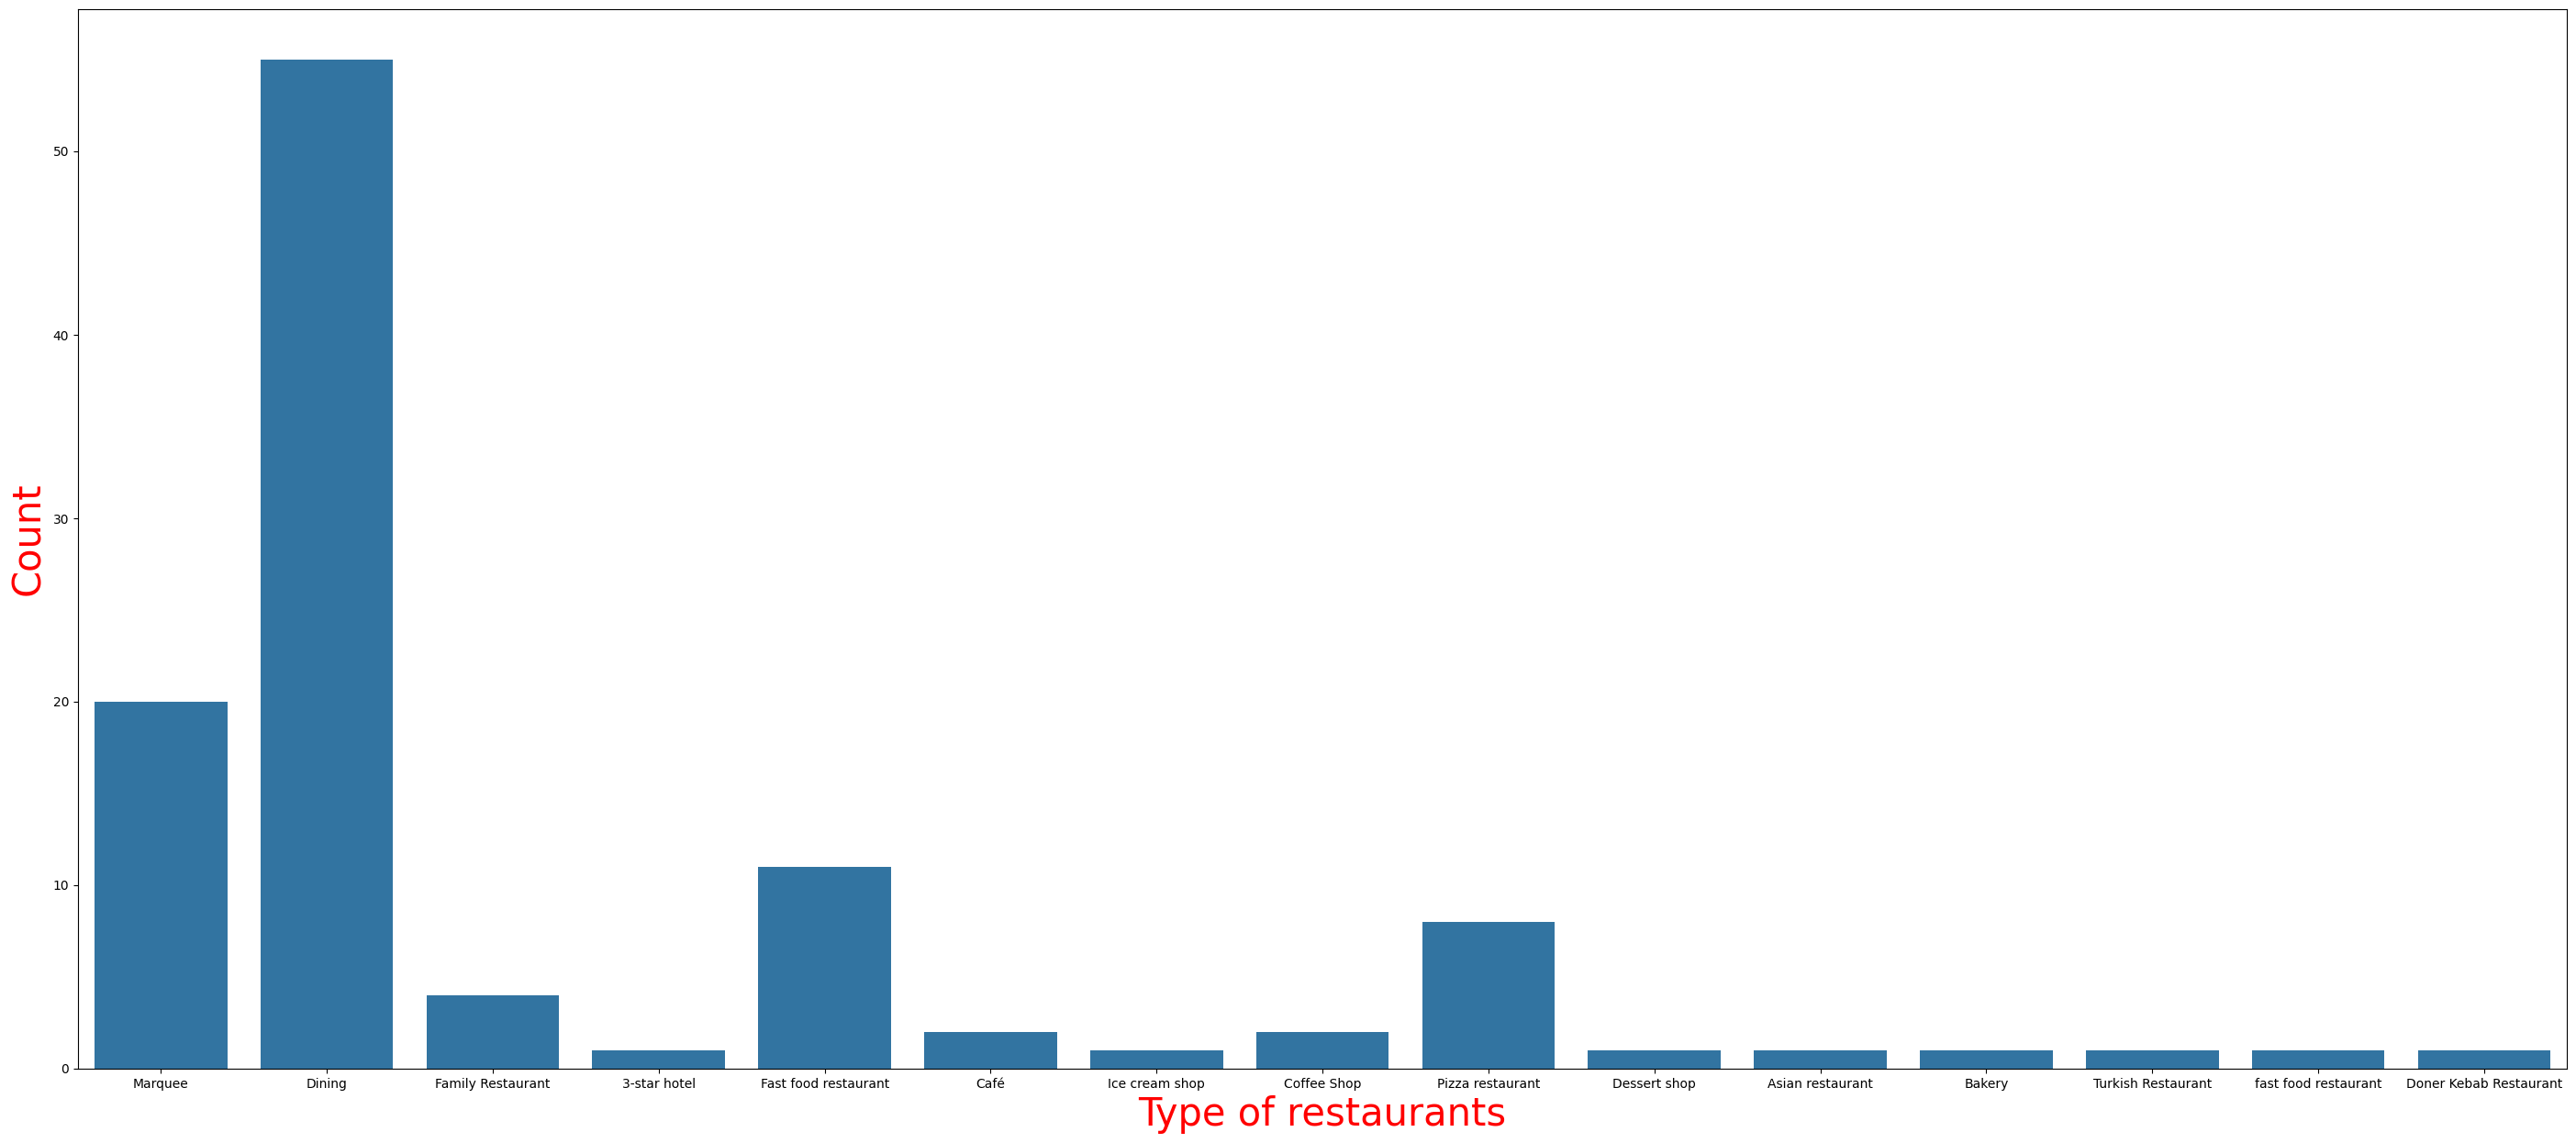

In [ ]:
#majority of people order from which type of restaurants ?

plt.figure(figsize = (35,15))
sns.countplot(x = df['Listed_in(type)'])
plt.xlabel("Type of restaurants", color='red', size=30)
plt.ylabel("Count", color='red', size=30)

In [ ]:
# Conclusion : Majority of people order from dining type of restaurants

Text(0, 0.5, 'Votes')

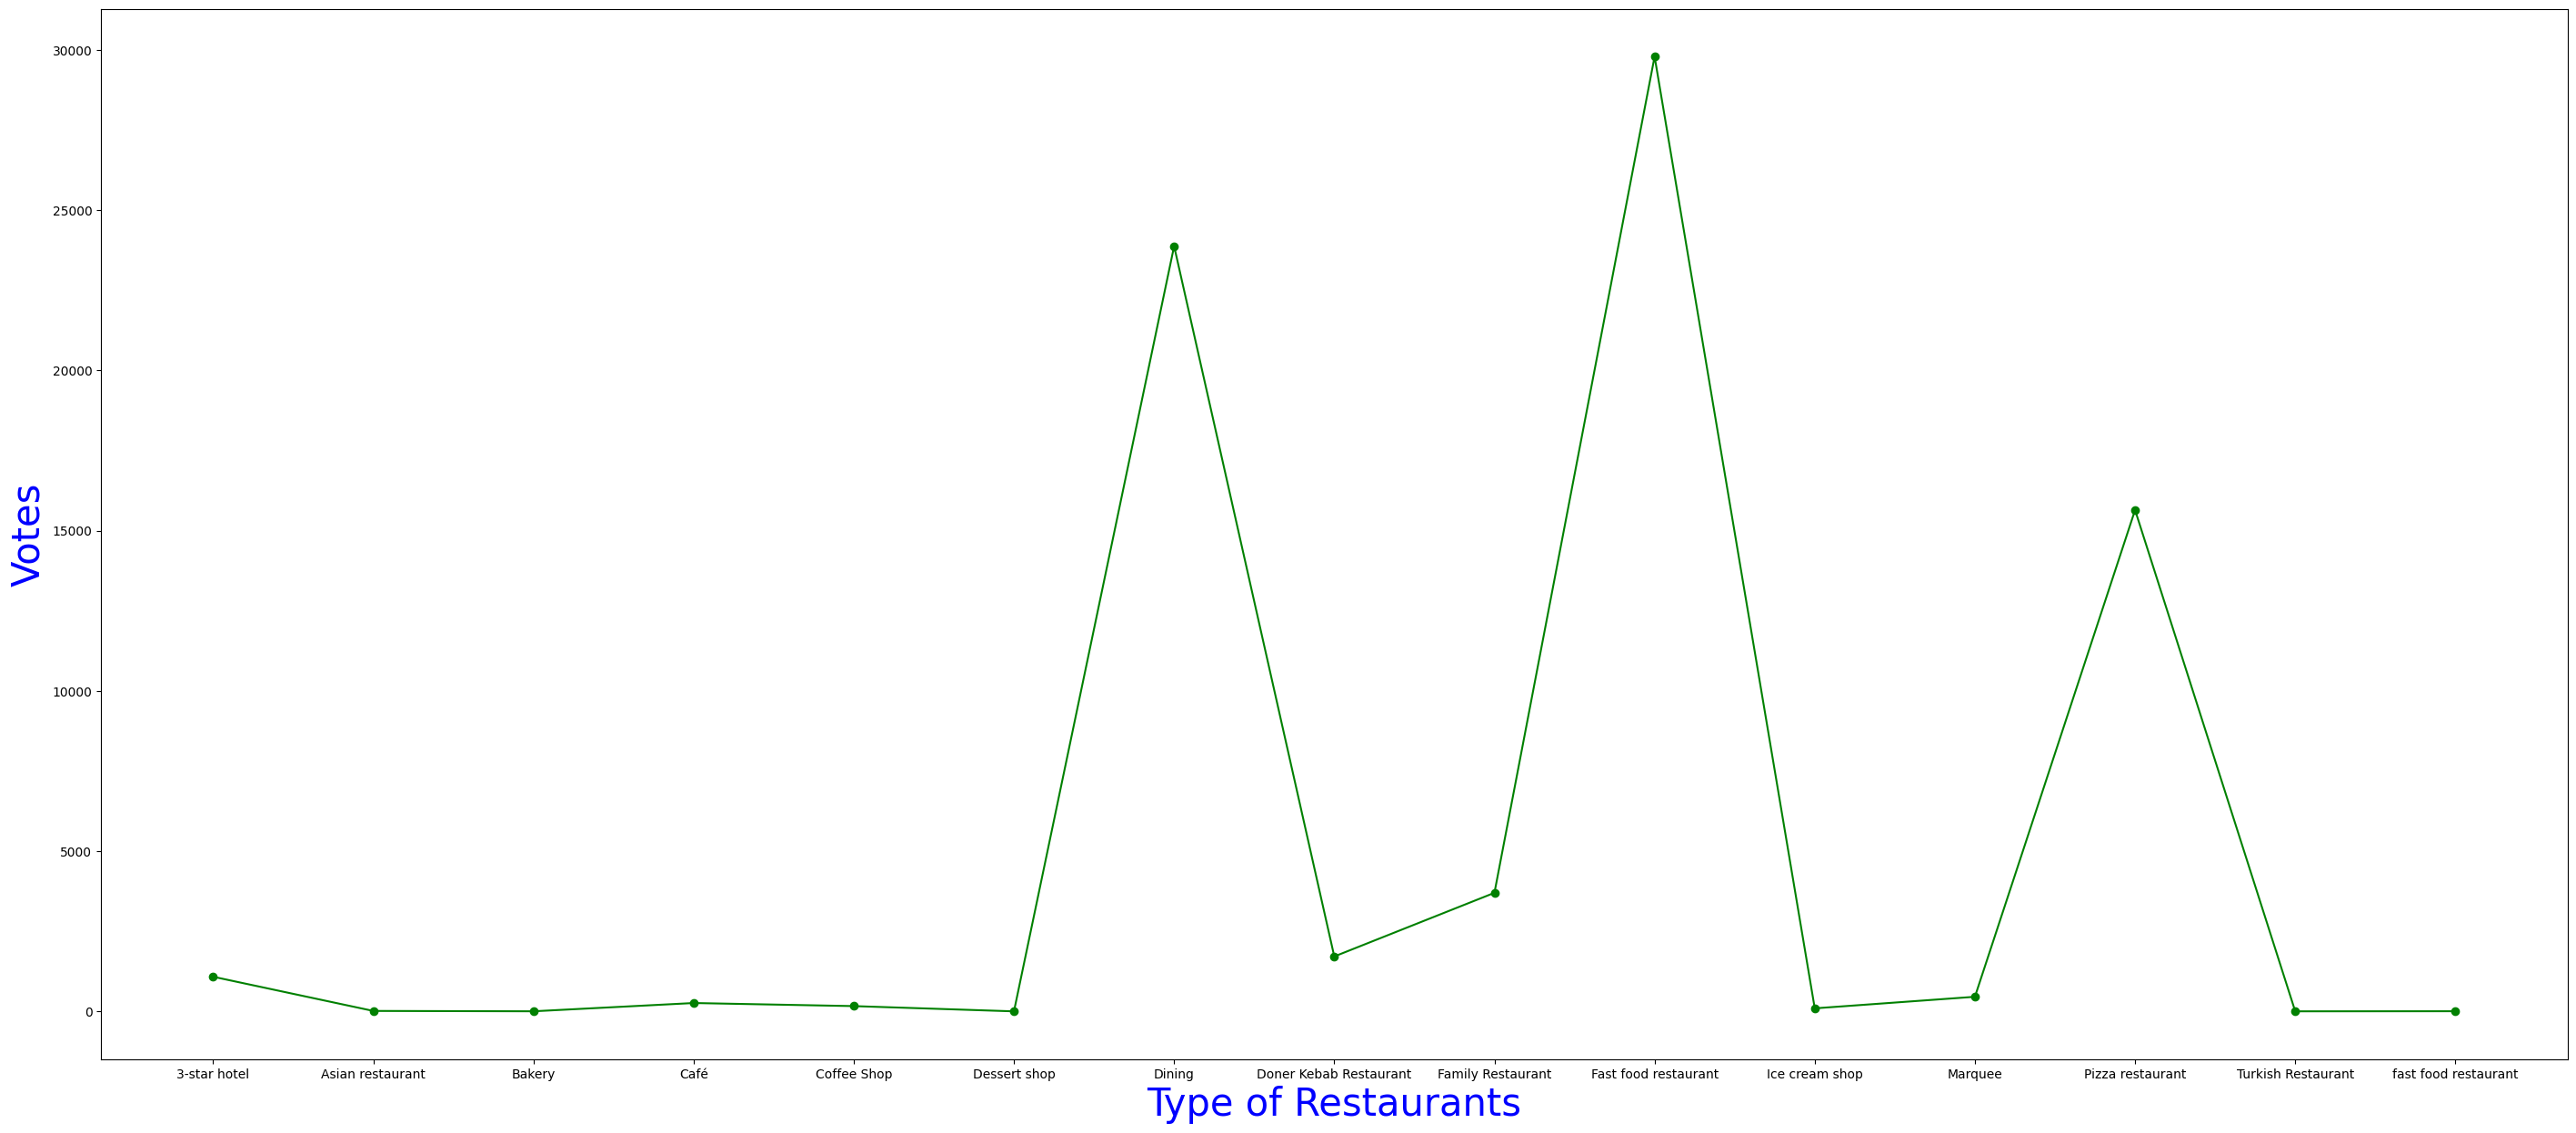

In [ ]:
# How many votes has each type of restaurant received from customer?

plt.figure(figsize = (35,15))
grouped_data = df.groupby('Listed_in(type)')['Vote'].sum()
result = pd.DataFrame({'Vote' : grouped_data})
plt.plot(result, color='green', marker='o')
plt.xlabel('Type of Restaurants', color='blue', size=30)
plt.ylabel('Votes', color='blue', size=30)

In [ ]:
# Conclusion :  Fast Food restaurant has received maximum votes.

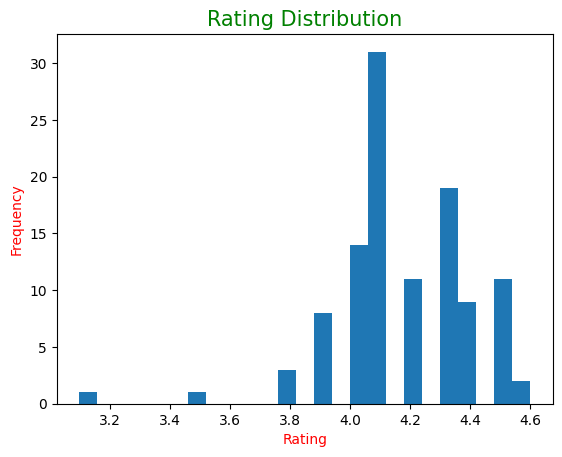

In [ ]:
# What are the rating that majority of the restaurants has received?

plt.hist(df['Rating'], bins=25)
plt.title('Rating Distribution', color='green', size=15)
plt.xlabel('Rating', color='red', size=10)
plt.ylabel('Frequency', color='red', size=10)
plt.show()

In [ ]:
# Conclusion : Majority restaurants received rating of 4.1

<Axes: xlabel='Online_Order/Booking', ylabel='Rating'>

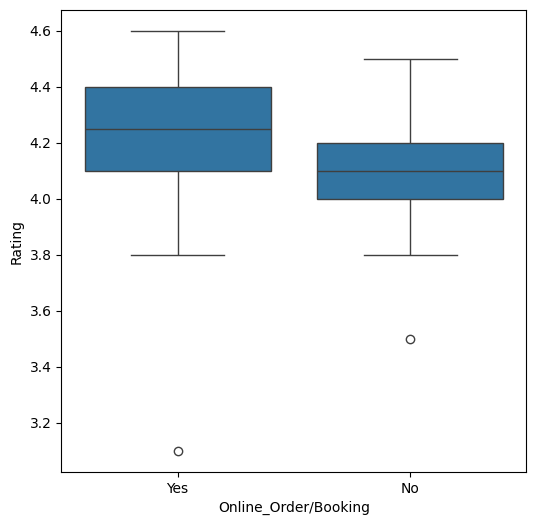

In [ ]:
# Which mode Online / Offline has received maximum rating?

plt.figure(figsize = (6,6))
sns.boxplot(x = 'Online_Order/Booking', y = 'Rating', data = df)

In [ ]:
# Conclusion : Offline orders received lower rating in comparison of Online Orders.

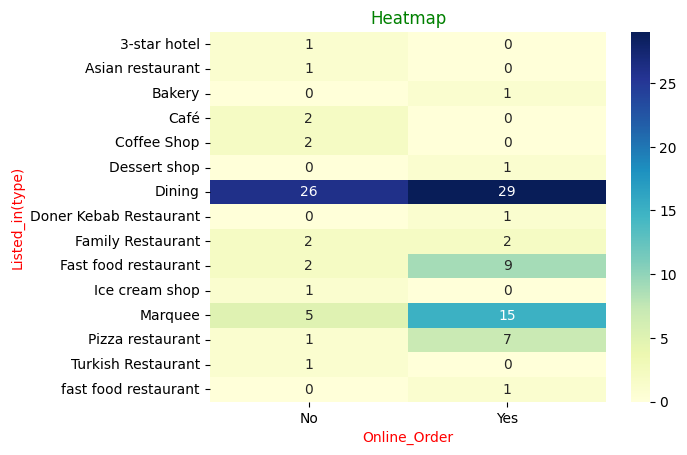

In [ ]:
# Which type of restaurants received more offline orders, so that faisalabad can provide customers with some good offers?

pivot_table = df.pivot_table(index = 'Listed_in(type)', columns = 'Online_Order/Booking', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.title('Heatmap', color = 'green')
plt.xlabel('Online_Order', color = 'red')
plt.ylabel('Listed_in(type)', color = 'red')
plt.show()

In [ ]:
# Conclusion : Dining restaurants primarily accept offline orders.

In [ ]:
#initialize lamatizer     (initialization by importing libraries such as nltk)
lemmatizer = WordNetLemmatizer()        #used to reduce word from their base/root

In [ ]:
#Text Processing Function

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha()]
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)

In [ ]:
#Applying Text Processing

df['Reviews'] = df['Reviews'].astype(str)
df['Reviews'] = df['Reviews'].apply(preprocess_text)

print(df['Reviews'])

0      location good doubt staff good cooking standar...
1                            good food excellent quality
2           ambience food good food serving service poor
3      nice tasty place especially rooftop service go...
4      highly recommended place family sitting enviro...
                             ...                        
105    good taste burger bbq sauce nothing else chick...
106    poor management conjusted space dish buffet ta...
107    serving size ridiculous compared price chargin...
108    perfect place great ambience catering standard...
109    love matter many time go kfc taste never get o...
Name: Reviews, Length: 110, dtype: object


In [ ]:
#Sentimental Analysis using TextBlob

def sentiment_analysis_textblob(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity
df['Sentiment'] = df['Reviews'].apply(sentiment_analysis_textblob)

print(df['Sentiment'])

0      0.387500
1      0.850000
2      0.150000
3      0.433333
4      0.430000
         ...   
105    0.133333
106   -0.350000
107   -0.303333
108    0.325000
109    0.410000
Name: Sentiment, Length: 110, dtype: float64


In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
#Sentimental Analysis using VADER  (Valance Aware Dictionary and sEntiment Reasoner)

def sentiment_analysis_vader(text):
    scores = sia.polarity_scores(text)
    return scores['compound']
df['Sentiment'] = df['Reviews'].apply(sentiment_analysis_vader)

print(df['Sentiment'])

0      0.5106
1      0.7650
2     -0.0516
3      0.7152
4      0.6115
        ...  
105    0.4404
106   -0.4767
107   -0.3612
108    0.7430
109    0.8860
Name: Sentiment, Length: 110, dtype: float64


In [ ]:
#Training a Sentiment Classification Model
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['Label'], test_size=0.1)

print(X_train, X_test, y_train, y_test)

17       like pizza wing whatever although dessert tasty
24                         one best cake shop faisalabad
101    rancher restaurant impressed burger perfect bl...
41                           best place town sajji lover
83     regency marquee memory made style elegant ambi...
                             ...                        
90     bad service food good smell kitchen chicken ha...
3      nice tasty place especially rooftop service go...
8      good option staying meeting event price little...
48                            quantity good quality good
39     fresh meat choice available cooking priced com...
Name: Reviews, Length: 99, dtype: object 85    loved decor really pretty food yummy worth vis...
1                           good food excellent quality
70            luv taste best bbq fsd service also great
33    great hospitality great taste peaceful atmosphere
14    good food ambiance also good good party family...
55    really love ambiance staff quite respected act

In [ ]:
#Training a Sentimental classification Model

vectorizer = TfidfVectorizer()    #used to convert data into numerical features
X_train_tfidf = vectorizer.fit_transform(X_train)
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(vectorizer.transform(X_test))

print(y_pred)

['Very Positive' 'Very Positive' 'Very Positive' 'Very Positive'
 'Very Positive' 'Very Positive' 'Positive' 'Positive' 'Very Positive'
 'Positive' 'Very Positive']


In [ ]:
#Evaluate Model

from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.45454545454545453
Classification Report:
               precision    recall  f1-score   support

      Neutral       0.00      0.00      0.00         1
     Positive       0.33      0.25      0.29         4
Very Negative       0.00      0.00      0.00         1
Very Positive       0.50      0.80      0.62         5

     accuracy                           0.45        11
    macro avg       0.21      0.26      0.23        11
 weighted avg       0.35      0.45      0.38        11



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
